# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
sns.set()
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

D:\Users\Legion\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
D:\Users\Legion\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


# Loading the Data

In [2]:
raw_data = pd.read_csv('Umico-laptops.csv')
data = raw_data.copy()
data

,Brend,Qurğunun növü,Seriya,Form-faktor,Əməliyyat sistemi,SİM kartının növü,SİM kartların sayı,Ekranın diaqonalı-düym,Ekranın qətnaməsi,Yaddaşın əsas həcmi,Ekran texnologiyası,Ekranın qətnaməsi-Mp,Prosessor,Prosessorun nüvələr sayı,Operativ yaddaşın həcmi,Daxili yaddaş həcmi,Yaddaş kartlarının dəstəklənməsi,Yaddaş kartları üçün yuvalar,Əsas kamera dəsti-Mp:,Əsas kamera-Mp:,Ön kamera dəsti-Mp,Ön kamera-Mp:,Bluetooth standartı,Qoşulma portu,Audio çıxış,Akkumulyatorun həcmi-mA/saat,Akkumulyatorun bərkitməsi,Simsiz enerji toplama,Korpusun qorunması,Rabitə standartları,Digər funksiyalar və xüsusiyyətlər,Bazarın başlanğıc ili,Rəng,Korpusun materialı,Hündürlüyü-mm,Eni-mm,Qalınlığı-mm,Çəki-q,İstehsalçı ölkə,Brendin ölkəsi,Evvelki qiymet,Yeni qiymet
0,Xiaomi,Smartfon,Xiaomi Redmi Note 11S,Monoblok,Android,Nano-SIM,2.0,6.43,Full HD+ (2640 x 1080),128 Gb,AMOLED,2400 x 1080,MediaTek Helio G96,8.0,8 Gb,128 Gb,Bəli,microSD,108+8+2+2,100 Mp və artıq,16,13 - 16 Mp,5.0,USB Type-C,Bəli,5000-5999,Çıxarılmayan,Xeyr,['Nəmə davamlı'-'Toza davamlı'],['LTE'-'3G'-'2G'],['Barmaq izi skaneri'-'Üz skaneri'-'Sürətli en...,2022.0,Boz,['Plastik'-'Şüşə'],159.87,73.87,8.09,179.0,Çin,Çin,579 ₼,514.86 ₼
1,Samsung,Smartfon,Samsung Galaxy A53,Monoblok,Android,Nano-SIM,2.0,6.50,Full HD+ (2640 x 1080),256 Gb,Super AMOLED,2400 x 1080,Samsung Exynos 1280,8.0,8 Gb,256 Gb,Bəli,microSD,64 + 12 + 5 + 5,49 - 64 Mp,32,31 - 39 Mp,5.1,USB Type-C,Xeyr,5000-5999,Çıxarılmayan,NaN,['Nəmə davamlı'],['5G'-'LTE'-'3G'-'2G'],['Barmaq izi skaneri'-'Qiroskop'-'Fənər'-'Akse...,2022.0,Qara,['Plastik'-'Şüşə'],159.60,74.8,8.1,189.0,NaN,Cənubi Koreya,1 099 ₼,863.32 ₼
2,Xiaomi,Smartfon,Xiaomi Redmi 10C,Monoblok,Android,Nano-SIM,2.0,6.71,HD+ (1792 x 820),128 Gb,IPS,1650 x 720,Qualcomm Snapdragon 680,8.0,4 Gb,128 Gb,Bəli,microSD,50 + 2,49 - 64 Mp,5,5 Mp qədər,5.0,USB Type-C,Bəli,5000-5999,Çıxarılmayan,Xeyr,['Müdafiəsiz'],['LTE'-'3G'-'2G'],['Akselerometr'-'İşıqlandırma göstəricisi'-'Ya...,2022.0,Boz,['Plastik'],169.59,76.56,8.29,190.0,Çin,Çin,449 ₼,319 ₼
3,Xiaomi,Smartfon,Xiaomi Redmi Note 11S,Monoblok,Android,Nano-SIM,2.0,6.43,Full HD+ (2640 x 1080),128 Gb,AMOLED,2400 x 1080,MediaTek Helio G96,8.0,6 Gb,128 Gb,Bəli,microSD,108+8+2+2,100 Mp və artıq,NaN,13 - 16 Mp,5.0,USB Type-C,Bəli,5000-5999,Çıxarılmayan,NaN,['Nəmə davamlı'-'Toza davamlı'],['2G'-'3G'-'LTE'],['Akselerometr'-'Qiroskop'-'İşıqlandırma göstə...,2022.0,Qara,['Plastik'],159.90,73.9,8.1,179.0,Çin,Çin,629 ₼,457.98 ₼
4,Samsung,Smartfon,Samsung Galaxy A13,Monoblok,Android,Nano-SIM,2.0,6.60,Full HD+ (2640 x 1080),64 Gb,PLS,2408 x 1080,Samsung Exynos 850,8.0,4 Gb,64 Gb,Bəli,microSDXC,50 + 5 + 2 + 2,49 - 64 Mp,NaN,6 - 8 Mp,5.0,USB Type-C,NaN,5000-5999,Çıxarılmayan,NaN,NaN,['LTE'-'3G'-'2G'],['Barmaq izi skaneri'-'Akselerometr'-'İşıqland...,2022.0,Qara,['Plastik'-'Şüşə'],165.10,76.4,8.8,195.0,NaN,Cənubi Koreya,429 ₼,379.32 ₼
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1704,Huawei,Smartfon,Huawei Nova Y70,Monoblok,Android,Nano-SIM,2.0,6.75,HD+ (1792 x 820),64 Gb,TFT,1600 x 720,HiSilicon Kirin 710A,8.0,4 Gb,64 Gb,Bəli,microSD,48 + 5 + 2,21 - 48 Mp,8,6 - 8 Mp,5.1,USB Type-C,Bəli,6000 və artıq,Çıxarılmayan,NaN,NaN,['LTE'-'3G'-'2G'],['Barmaq izi skaneri'-'Akselerometr'-'İşıqland...,2022.0,Qara,['Plastik'],168.30,77.7,8.98,198.0,Çin,Çin,385 ₼,NaN
1705,Tecno,Smartfon,Tecno Pova 3,Monoblok,Android,Nano-SIM,2.0,6.90,Full HD+ (2640 x 1080),128 Gb,IPS,2460 x 1080,MediaTek Helio G88,8.0,6 Gb,128 Gb,Bəli,microSD,50 + 2 + 2,49 - 64 Mp,8,6 - 8 Mp,4.2,USB Type-C,Bəli,7000,Çıxarılmayan,Xeyr,['Müdafiəsiz'],['LTE'-'3G'-'2G'],['Barmaq izi skaneri'-'Üz skaneri'-'Sürətli en...,2022.0,Göy,['Plastik'],173.10,78.46,9.44,188.0,Çin,Çin,549 ₼,430 ₼
1706,Samsung,Smartfon,Samsung Galaxy A03,Monoblok,Android,Nano-SIM,2.0,6.50,HD+ (1792 x 820),32 Gb,TFT,1600 x 720,Unisoc T606,8.0,3 Gb,32 Gb,Bəli,microSD,48+2,21 - 48 Mp,NaN,5 Mp qədər,5.0,MicroUSB,B

## Change Column Names

In [3]:
data.columns

Index(['Brend', 'Qurğunun növü', 'Seriya', 'Form-faktor', 'Əməliyyat sistemi',
       'SİM kartının növü', 'SİM kartların sayı', 'Ekranın diaqonalı-düym',
       'Ekranın qətnaməsi', 'Yaddaşın əsas həcmi', 'Ekran texnologiyası',
       'Ekranın qətnaməsi-Mp', 'Prosessor', 'Prosessorun nüvələr sayı',
       'Operativ yaddaşın həcmi', 'Daxili yaddaş həcmi',
       'Yaddaş kartlarının dəstəklənməsi', 'Yaddaş kartları üçün yuvalar',
       'Əsas kamera dəsti-Mp:', 'Əsas kamera-Mp:', 'Ön kamera dəsti-Mp',
       'Ön kamera-Mp:', 'Bluetooth standartı', 'Qoşulma portu', 'Audio çıxış',
       'Akkumulyatorun həcmi-mA/saat', 'Akkumulyatorun bərkitməsi',
       'Simsiz enerji toplama', 'Korpusun qorunması', 'Rabitə standartları',
       'Digər funksiyalar və xüsusiyyətlər', 'Bazarın başlanğıc ili', 'Rəng',
       'Korpusun materialı', 'Hündürlüyü-mm', 'Eni-mm', 'Qalınlığı-mm',
       'Çəki-q', 'İstehsalçı ölkə', 'Brendin ölkəsi', 'Evvelki qiymet',
       'Yeni qiymet'],
      dtype='object')

In [4]:
data.set_axis(['brand', 'type', 'serie', 'form-factor', 'operating_system',
       'sim_cart_type', 'num_of_sim_cart', 'screen_diagonal',
       'screen_resolution', 'memory_size', 'screen_technology',
       'screen_technology-mp', 'processor', 'num_of_processor_cores',
       'ram_size', 'internal_memory_size',
       'Memory_card_support', 'Memory_card_slots',
       'Main_camera_set_mp', 'main_camera_mp', 'front_camera_set_mp',
       'front_camera_mp', 'bluetooth_standart', 'connection_port', 'audio_output',
       'battery_capacity_mah', 'fixing_the_accumulator',
       'wireless_energy_harvesting', 'corpus_protection', 'communication_standards',
       'other_functions_and_features', 'year_of_market_launch', 'color',
       'corpus_material', 'height_mm', 'width_mm', 'thickness_mm',
       'weight_q', 'producing_country', 'country_of_brand', 'old_price',
       'new_price'], axis="columns", inplace=True)

In [5]:
data

,brand,type,serie,form-factor,operating_system,sim_cart_type,num_of_sim_cart,screen_diagonal,screen_resolution,memory_size,screen_technology,screen_technology-mp,processor,num_of_processor_cores,ram_size,internal_memory_size,Memory_card_support,Memory_card_slots,Main_camera_set_mp,main_camera_mp,front_camera_set_mp,front_camera_mp,bluetooth_standart,connection_port,audio_output,battery_capacity_mah,fixing_the_accumulator,wireless_energy_harvesting,corpus_protection,communication_standards,other_functions_and_features,year_of_market_launch,color,corpus_material,height_mm,width_mm,thickness_mm,weight_q,producing_country,country_of_brand,old_price,new_price
0,Xiaomi,Smartfon,Xiaomi Redmi Note 11S,Monoblok,Android,Nano-SIM,2.0,6.43,Full HD+ (2640 x 1080),128 Gb,AMOLED,2400 x 1080,MediaTek Helio G96,8.0,8 Gb,128 Gb,Bəli,microSD,108+8+2+2,100 Mp və artıq,16,13 - 16 Mp,5.0,USB Type-C,Bəli,5000-5999,Çıxarılmayan,Xeyr,['Nəmə davamlı'-'Toza davamlı'],['LTE'-'3G'-'2G'],['Barmaq izi skaneri'-'Üz skaneri'-'Sürətli en...,2022.0,Boz,['Plastik'-'Şüşə'],159.87,73.87,8.09,179.0,Çin,Çin,579 ₼,514.86 ₼
1,Samsung,Smartfon,Samsung Galaxy A53,Monoblok,Android,Nano-SIM,2.0,6.50,Full HD+ (2640 x 1080),256 Gb,Super AMOLED,2400 x 1080,Samsung Exynos 1280,8.0,8 Gb,256 Gb,Bəli,microSD,64 + 12 + 5 + 5,49 - 64 Mp,32,31 - 39 Mp,5.1,USB Type-C,Xeyr,5000-5999,Çıxarılmayan,NaN,['Nəmə davamlı'],['5G'-'LTE'-'3G'-'2G'],['Barmaq izi skaneri'-'Qiroskop'-'Fənər'-'Akse...,2022.0,Qara,['Plastik'-'Şüşə'],159.60,74.8,8.1,189.0,NaN,Cənubi Koreya,1 099 ₼,863.32 ₼
2,Xiaomi,Smartfon,Xiaomi Redmi 10C,Monoblok,Android,Nano-SIM,2.0,6.71,HD+ (1792 x 820),128 Gb,IPS,1650 x 720,Qualcomm Snapdragon 680,8.0,4 Gb,128 Gb,Bəli,microSD,50 + 2,49 - 64 Mp,5,5 Mp qədər,5.0,USB Type-C,Bəli,5000-5999,Çıxarılmayan,Xeyr,['Müdafiəsiz'],['LTE'-'3G'-'2G'],['Akselerometr'-'İşıqlandırma göstəricisi'-'Ya...,2022.0,Boz,['Plastik'],169.59,76.56,8.29,190.0,Çin,Çin,449 ₼,319 ₼
3,Xiaomi,Smartfon,Xiaomi Redmi Note 11S,Monoblok,Android,Nano-SIM,2.0,6.43,Full HD+ (2640 x 1080),128 Gb,AMOLED,2400 x 1080,MediaTek Helio G96,8.0,6 Gb,128 Gb,Bəli,microSD,108+8+2+2,100 Mp və artıq,NaN,13 - 16 Mp,5.0,USB Type-C,Bəli,5000-5999,Çıxarılmayan,NaN,['Nəmə davamlı'-'Toza davamlı'],['2G'-'3G'-'LTE'],['Akselerometr'-'Qiroskop'-'İşıqlandırma göstə...,2022.0,Qara,['Plastik'],159.90,73.9,8.1,179.0,Çin,Çin,629 ₼,457.98 ₼
4,Samsung,Smartfon,Samsung Galaxy A13,Monoblok,Android,Nano-SIM,2.0,6.60,Full HD+ (2640 x 1080),64 Gb,PLS,2408 x 1080,Samsung Exynos 850,8.0,4 Gb,64 Gb,Bəli,microSDXC,50 + 5 + 2 + 2,49 - 64 Mp,NaN,6 - 8 Mp,5.0,USB Type-C,NaN,5000-5999,Çıxarılmayan,NaN,NaN,['LTE'-'3G'-'2G'],['Barmaq izi skaneri'-'Akselerometr'-'İşıqland...,2022.0,Qara,['Plastik'-'Şüşə'],165.10,76.4,8.8,195.0,NaN,Cənubi Koreya,429 ₼,379.32 ₼
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1704,Huawei,Smartfon,Huawei Nova Y70,Monoblok,Android,Nano-SIM,2.0,6.75,HD+ (1792 x 820),64 Gb,TFT,1600 x 720,HiSilicon Kirin 710A,8.0,4 Gb,64 Gb,Bəli,microSD,48 + 5 + 2,21 - 48 Mp,8,6 - 8 Mp,5.1,USB Type-C,Bəli,6000 və artıq,Çıxarılmayan,NaN,NaN,['LTE'-'3G'-'2G'],['Barmaq izi skaneri'-'Akselerometr'-'İşıqland...,2022.0,Qara,['Plastik'],168.30,77.7,8.98,198.0,Çin,Çin,385 ₼,NaN
1705,Tecno,Smartfon,Tecno Pova 3,Monoblok,Android,Nano-SIM,2.0,6.90,Full HD+ (2640 x 1080),128 Gb,IPS,2460 x 1080,MediaTek Helio G88,8.0,6 Gb,128 Gb,Bəli,microSD,50 + 2 + 2,49 - 64 Mp,8,6 - 8 Mp,4.2,USB Type-C,Bəli,7000,Çıxarılmayan,Xeyr,['Müdafiəsiz'],['LTE'-'3G'-'2G'],['Barmaq izi skaneri'-'Üz skaneri'-'Sürətli en...,2022.0,Göy,['Plastik'],173.10,78.46,9.44,188.0,Çin,Çin,549 ₼,430 ₼
1706,Samsung,Smartfon,Samsung Galaxy A03,Monoblok,Android,Nano-SIM,2.0,6.50,HD+ (1792 x 820),32 Gb,TFT,1600 x 720,Unisoc T606,8.0,3 Gb,32 Gb,Bəli,microSD,48+2,21 - 48 Mp,NaN,5 Mp qədər,5.0,MicroUSB,Bəli,5000-5999,Çıxarılmayan,NaN,['Müdafiəsiz'],['LTE'-'3G'-'2G'],['İşıqlandırma göstərici

## Some descriptive statistics

In [6]:
data.isnull().sum()

brand                              3
type                               2
serie                              8
form-factor                       17
operating_system                 118
sim_cart_type                     40
num_of_sim_cart                   33
screen_diagonal                   21
screen_resolution                 76
memory_size                      195
screen_technology                 50
screen_technology-mp              89
processor                        147
num_of_processor_cores           159
ram_size                          94
internal_memory_size              57
Memory_card_support               35
Memory_card_slots                147
Main_camera_set_mp               198
main_camera_mp                    68
front_camera_set_mp             1008
front_camera_mp                  182
bluetooth_standart                95
connection_port                   56
audio_output                     192
battery_capacity_mah              66
fixing_the_accumulator           102
w

In [7]:
data.isnull().sum().sum()

5833

In [8]:
data.describe(include="all")

,brand,type,serie,form-factor,operating_system,sim_cart_type,num_of_sim_cart,screen_diagonal,screen_resolution,memory_size,screen_technology,screen_technology-mp,processor,num_of_processor_cores,ram_size,internal_memory_size,Memory_card_support,Memory_card_slots,Main_camera_set_mp,main_camera_mp,front_camera_set_mp,front_camera_mp,bluetooth_standart,connection_port,audio_output,battery_capacity_mah,fixing_the_accumulator,wireless_energy_harvesting,corpus_protection,communication_standards,other_functions_and_features,year_of_market_launch,color,corpus_material,height_mm,width_mm,thickness_mm,weight_q,producing_country,country_of_brand,old_price,new_price
count,1706,1707,1701,1692,1591,1669,1676.000000,1688.000000,1633,1514,1659,1620,1562,1550.000000,1615,1652,1674,1562,1511,1641,701,1527,1614.000000,1653,1517,1643,1607,1407,1198,1681,1621,1561.000000,1705,1665,1673.000000,1664,1671,1659.000000,1356,1517,1709,973
unique,44,2,413,3,10,5,NaN,NaN,15,24,16,97,181,NaN,10,10,2,5,127,7,24,8,NaN,3,2,22,2,2,20,33,467,NaN,19,30,NaN,193,136,NaN,8,11,588,645
top,Apple,Smartfon,Apple iPhone 13,Monoblok,Android,Nano-SIM,NaN,NaN,Full HD+ (2640 x 1080),128 Gb,IPS,2400 x 1080,Apple A15 Bionic,NaN,4 Gb,128 Gb,Bəli,microSD,12+12,9 - 15 Mp,12,9 - 12 Mp,NaN,USB Type-C,Bəli,5000-5999,Çıxarılmayan,Xeyr,['Müdafiəsiz'],['LTE'-'3G'-'2G'],['Fənər'],NaN,Qara,['Plastik'],NaN,71.5,7.7,NaN,Çin,Çin,2 999 ₼,2 699 ₼
freq,509,1540,58,1648,1028,1499,NaN,NaN,822,582,476,317,214,NaN,529,631,973,730,241,623,210,565,NaN,803,945,564,1472,817,338,443,90,NaN,511,640,NaN,226,142,NaN,1223,557,41,12
mean,NaN,NaN,NaN,NaN,NaN,NaN,1.884248,5.953217,NaN,NaN,NaN,NaN,NaN,6.968387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.860409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.547085,NaN,NaN,153.582367,NaN,NaN,182.316890,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,0.385981,1.268914,NaN,NaN,NaN,NaN,NaN,1.506056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.594332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.537311,NaN,NaN,14.184908,NaN,NaN,36.246215,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.630000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,NaN,67.000000,NaN,NaN,27.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,6.100000,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.000000,NaN,NaN,146.700000,NaN,NaN,169.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,6.490000,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.000000,NaN,NaN,159.600000,NaN,NaN,190.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,6.600000,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022.000000,NaN,NaN,163.700000,NaN,NaN,201.000000,NaN,NaN,NaN,NaN


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1709 entries, 0 to 1708
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   brand                         1706 non-null   object 
 1   type                          1707 non-null   object 
 2   serie                         1701 non-null   object 
 3   form-factor                   1692 non-null   object 
 4   operating_system              1591 non-null   object 
 5   sim_cart_type                 1669 non-null   object 
 6   num_of_sim_cart               1676 non-null   float64
 7   screen_diagonal               1688 non-null   float64
 8   screen_resolution             1633 non-null   object 
 9   memory_size                   1514 non-null   object 
 10  screen_technology             1659 non-null   object 
 11  screen_technology-mp          1620 non-null   object 
 12  processor                     1562 non-null   object 
 13  num

## Analyze Columns

In [10]:
data['main_camera_mp'].unique()

array(['100 Mp və artıq', '49 - 64 Mp', '21 - 48 Mp', '9 - 15 Mp',
       '5 Mp qədər', '6 - 8 Mp', nan, '16 - 20 Mp'], dtype=object)

In [11]:
data['front_camera_mp'].unique()

array(['13 - 16 Mp', '31 - 39 Mp', '5 Mp qədər', '6 - 8 Mp', '17 - 20 Mp',
       '9 - 12 Mp', nan, '40 Mp və artıq', '21 - 25 Mp'], dtype=object)

In [12]:
data['num_of_sim_cart'].unique()

array([ 2.,  1., nan,  3.,  4.])

In [13]:
data['Main_camera_set_mp'].unique()

array(['108+8+2+2', '64 + 12 + 5 + 5', '50 + 2', '50 + 5 + 2 + 2',
       '108 + 8 + 2', '64+8+2+2', '48 + 12 + 12', '48+8+5+2', '50+8+2+2',
       '12+12', '64 + 5 + 2 + 2', nan, '108 + 12 + 5 + 5', '13+2',
       '64+8+5', '48+2', '108 + 13 + 2', '108 + 8 + 5 + 2', '13',
       '108+12+10+10', '50 + 10 + 12', '50 + 2 + 2', '64+8+5+5', '13+2+2',
       '12+12+12', '8', '2', '64+8+2', '108+8+5', '50 + 12 + 10',
       '8 + 0.08', '48 + 5 + 2', '20 + 0.3 + 0.3', '64+12+2+2', '64',
       '108 + 12+ 10 + 10', '48+8+2', '48+5+2+2', '54 + 50 + 2',
       '8 + 0.3 + 0.3', '13+2+0.3+0.3', '50 + 8 + 2', '12x12x12', '16',
       '12', '64 + 2 + 2', '8 + 8', '48+8+2+2', '0.3', '1.3', '16+12+12',
       '50 + 48 + 48', '8 + 0.3', '13+5', '12+12+8', '12x12',
       '200 + 8 + 2', '108 + 64 + 8 + 2', '25+8+5', '48+2+2',
       '48 + 2 + 0.3', '0.80', '108 + 10 + 12 + 10', '48',
       '200 + 10 + 10 + 12', '12+5', '50+8', '64+12+5', '40 + 13 + 32',
       '50 + 2 + 0.3', '64+12+12', '5', '13+5+2',

In [14]:
data['battery_capacity_mah'].unique()

array(['5000-5999', '3000-3999', '4000-4999', '3279', '1999 qədər',
       '4323', '3700', nan, '6000 və artıq', '4380', '4780', '900',
       '2018', '300', '1750', '5010', '4230', '700', '2900', '5080',
       '4360', '400', '7000'], dtype=object)

In [15]:
data['screen_resolution'].unique()

array(['Full HD+ (2640 x 1080)', 'HD+ (1792 x 820)', 'qHD (960) qədər',
       'Quad HD+ (3200 x 1440)', nan, 'Quad HD (3040 x 1440)',
       'QXGA+ (2208 x 1768)', 'HD (1280 x 720)', 'Full HD (1920 x 1080)',
       '2790 x 1188', '1080 x 2280', '2796 x 1290', '2556 x 179',
       '220 x 176', '2700 x 1228', '720 x 1520'], dtype=object)

In [16]:
data['connection_port'].value_counts()

USB Type-C    803
Lightning     509
MicroUSB      341
Name: connection_port, dtype: int64

In [17]:
data['weight_q'].value_counts()

240.0    93
195.0    92
194.0    90
190.0    58
189.0    58
         ..
67.9      1
154.0     1
130.0     1
105.0     1
74.0      1
Name: weight_q, Length: 147, dtype: int64

In [18]:
data['internal_memory_size'].value_counts()

128 Gb        631
64 Gb         324
256 Gb        300
32 Gb         169
1 Gb qədər    102
512 Gb         37
16 Gb          36
8 Gb           20
1 Tb           18
4 Gb           15
Name: internal_memory_size, dtype: int64

In [19]:
data['ram_size'].value_counts()

4 Gb          529
6 Gb          448
8 Gb          239
2 Gb          119
3 Gb          116
1 Gb qədər     83
12 Gb          49
1 Gb           29
1.5 Gb          2
9 Gb            1
Name: ram_size, dtype: int64

In [20]:
data['battery_capacity_mah'].value_counts()

5000-5999        564
3000-3999        340
4000-4999        323
1999 qədər       282
6000 və artıq     32
4323              30
3700              25
3279              22
2018               6
5010               4
4380               3
2900               2
4780               1
900                1
300                1
1750               1
4230               1
700                1
5080               1
4360               1
400                1
7000               1
Name: battery_capacity_mah, dtype: int64

In [21]:
data['year_of_market_launch'].value_counts()

2022.0    495
2021.0    447
2020.0    289
2019.0    202
2018.0     50
2016.0     30
2017.0     30
2015.0      9
2023.0      4
2013.0      2
2014.0      2
2008.0      1
Name: year_of_market_launch, dtype: int64

In [22]:
data['color'].value_counts()

Qara              511
Göy               211
Ağ                166
Boz               149
Mavi              135
Yaşıl             126
Qızılı             86
Bənövşəyi          85
Qırmızı            68
Gümüşü             63
Çəhrayı            39
Narıncı            22
Sarı               17
Bürünc             12
Bej                 5
Firuzəyi            5
Tunc rəngli         2
Qəhvəyi             2
Tünd bənövşəyi      1
Name: color, dtype: int64

In [23]:
data['corpus_material'].value_counts()

['Plastik']                        640
['Alüminium'-'Şüşə']               217
['Plastik'-'Şüşə']                 176
['Şüşə'-'Alüminium']               134
['Paslanmayan polad'-'Şüşə']       106
['Metal'-'Şüşə']                   104
['Şüşə'-'Paslanmayan polad']        76
['Şüşə'-'Plastik']                  44
['Şüşə']                            43
['Metal']                           18
['Plastik'-'Metal']                 17
['Alüminium']                       15
['Metal'-'Plastik']                 15
['Plastik'-'Alüminium'-'Şüşə']      14
['Polad'-'Şüşə']                    12
['Alüminium'-'Plastik']              5
['Plastik'-'Şüşə'-'Alüminium']       5
['Şüşə'-'Metal']                     4
['Paslanmayan polad']                4
['Alüminium'-'Şüşə'-'Plastik']       3
['Plastik'-'Alüminium']              2
['Alüminium'-'Plastik'-'Şüşə']       2
['Keramika'-'Metal']                 2
['Alüminium'-'Keramika'-'Şüşə']      1
['Plastik'-'Dəri']                   1
['Alüminium'-'Şüşə'-'Kera

In [24]:
data['communication_standards'].value_counts()

['LTE'-'3G'-'2G']                              443
['2G'-'3G'-'LTE']                              325
['LTE'-'3G'-'5G'-'2G']                         266
['2G'-'3G'-'LTE'-'5G']                         194
['2G']                                         119
['5G'-'LTE'-'3G'-'2G']                          90
['LTE'-'3G'-'5G']                               58
['LTE'-'3G']                                    35
['LTE'-'3G'-'2G'-'5G']                          29
['LTE'-'5G']                                    23
['2G'-'LTE'-'3G'-'5G']                          16
['2G'-'3G']                                     12
['3G'-'LTE']                                     9
['2G'-'LTE'-'3G']                                9
['3G'-'LTE'-'2G']                                6
['5G'-'LTE'-'3G']                                5
['3G'-'5G']                                      5
['2G'-'LTE'-'5G']                                4
['3G'-'LTE'-'5G']                                4
['3G'-'2G']                    

In [25]:
data['screen_technology-mp'].unique()

array(['2400 x 1080', '1650 x 720', '2408 x 1080', '1650 X 720',
       '2556 x 1179', '2532 x 1170', '2388 x 1080', '1600 x 720',
       '1792 x 828', '1080 x 2400', '160 x 128', '2796 x 1290',
       '2712 x 1220', nan, '2400 х 1080', '3088 x 1440', '2340 x 1080',
       '1170 x 2532', '3040 x 1440', '2460 x 1080', '1080 x 2340',
       '2176 x 1812', '1284 x 2778', '1600 × 720', '2537 x 1170',
       '1792 x 820', '2778 x 1284', '2640 x 1080', '432 x 240',
       '1560 x 720', '320 x 240', '1920 x 1080', '1334 x 750',
       '240 x 320', '2960 x 1440', '1520 x 720', '3200 x 1440',
       '480 x 320', '1080 x 1920', '160 x 120', '1480 x 720',
       '1612 x 720', '2412 x 1080', '128 x 128', '2248 x 1080',
       '2688 x 1242', '2532×1170', '640 x 360', '2280 x 1080',
       '2208 x 1768', '2790 x 1188', '2688х1242', '800 x 480',
       '2436 x 1125', '3200 x 1400', '1640 x 720', '1440 x 720',
       '2556 x 179', '2160 x 1080', '1280 x 720', '1560x720', '960х480',
       '220 x 176',

In [26]:
data['serie'].unique()

array(['Xiaomi Redmi Note 11S', 'Samsung Galaxy A53', 'Xiaomi Redmi 10C',
       'Samsung Galaxy A13', 'Xiaomi Redmi Note 11 Pro 5G',
       'Samsung Galaxy A32', 'Apple iPhone 14 Pro', 'Samsung Galaxy A33',
       'Xiaomi 12 Lite', 'Xiaomi Redmi Note 11', 'Apple iPhone 14',
       'Apple iPhone 13', 'Samsung Galaxy A23', 'Honor X8',
       'Xiaomi Poco X4 Pro', 'Xiaomi Redmi 10A', 'Apple iPhone 11',
       'Samsung Galaxy A73', 'INOI 288S', 'Apple iPhone 14 Pro Max',
       'Xiaomi 12T', 'Xiaomi Redmi Note 11 Pro', 'Xiaomi Mi 11 Lite',
       'Xiaomi Redmi 10', 'Samsung Galaxy A03', 'Apple iPhone 12',
       'Infinix Zero 20', 'Xiaomi Redmi Note 10 Pro', 'Xiaomi Redmi 9A',
       'Samsung Galaxy S22 Ultra', 'Samsung Galaxy S22',
       'Samsung Galaxy A04', 'Xiaomi Poco M5', 'Xiaomi Redmi 9C',
       'Apple iPhone 13 Pro', 'Samsung Galaxy A04s', 'Xiaomi Poco C40',
       'Infinix Note 10 Pro', 'Samsung Galaxy A03 Core',
       'Apple iPhone 13 mini', 'Hope V1', 'Xiaomi Poco X3 GT', 'H

# Preprosessing

## Drop useless columns

In [27]:
data

,brand,type,serie,form-factor,operating_system,sim_cart_type,num_of_sim_cart,screen_diagonal,screen_resolution,memory_size,screen_technology,screen_technology-mp,processor,num_of_processor_cores,ram_size,internal_memory_size,Memory_card_support,Memory_card_slots,Main_camera_set_mp,main_camera_mp,front_camera_set_mp,front_camera_mp,bluetooth_standart,connection_port,audio_output,battery_capacity_mah,fixing_the_accumulator,wireless_energy_harvesting,corpus_protection,communication_standards,other_functions_and_features,year_of_market_launch,color,corpus_material,height_mm,width_mm,thickness_mm,weight_q,producing_country,country_of_brand,old_price,new_price
0,Xiaomi,Smartfon,Xiaomi Redmi Note 11S,Monoblok,Android,Nano-SIM,2.0,6.43,Full HD+ (2640 x 1080),128 Gb,AMOLED,2400 x 1080,MediaTek Helio G96,8.0,8 Gb,128 Gb,Bəli,microSD,108+8+2+2,100 Mp və artıq,16,13 - 16 Mp,5.0,USB Type-C,Bəli,5000-5999,Çıxarılmayan,Xeyr,['Nəmə davamlı'-'Toza davamlı'],['LTE'-'3G'-'2G'],['Barmaq izi skaneri'-'Üz skaneri'-'Sürətli en...,2022.0,Boz,['Plastik'-'Şüşə'],159.87,73.87,8.09,179.0,Çin,Çin,579 ₼,514.86 ₼
1,Samsung,Smartfon,Samsung Galaxy A53,Monoblok,Android,Nano-SIM,2.0,6.50,Full HD+ (2640 x 1080),256 Gb,Super AMOLED,2400 x 1080,Samsung Exynos 1280,8.0,8 Gb,256 Gb,Bəli,microSD,64 + 12 + 5 + 5,49 - 64 Mp,32,31 - 39 Mp,5.1,USB Type-C,Xeyr,5000-5999,Çıxarılmayan,NaN,['Nəmə davamlı'],['5G'-'LTE'-'3G'-'2G'],['Barmaq izi skaneri'-'Qiroskop'-'Fənər'-'Akse...,2022.0,Qara,['Plastik'-'Şüşə'],159.60,74.8,8.1,189.0,NaN,Cənubi Koreya,1 099 ₼,863.32 ₼
2,Xiaomi,Smartfon,Xiaomi Redmi 10C,Monoblok,Android,Nano-SIM,2.0,6.71,HD+ (1792 x 820),128 Gb,IPS,1650 x 720,Qualcomm Snapdragon 680,8.0,4 Gb,128 Gb,Bəli,microSD,50 + 2,49 - 64 Mp,5,5 Mp qədər,5.0,USB Type-C,Bəli,5000-5999,Çıxarılmayan,Xeyr,['Müdafiəsiz'],['LTE'-'3G'-'2G'],['Akselerometr'-'İşıqlandırma göstəricisi'-'Ya...,2022.0,Boz,['Plastik'],169.59,76.56,8.29,190.0,Çin,Çin,449 ₼,319 ₼
3,Xiaomi,Smartfon,Xiaomi Redmi Note 11S,Monoblok,Android,Nano-SIM,2.0,6.43,Full HD+ (2640 x 1080),128 Gb,AMOLED,2400 x 1080,MediaTek Helio G96,8.0,6 Gb,128 Gb,Bəli,microSD,108+8+2+2,100 Mp və artıq,NaN,13 - 16 Mp,5.0,USB Type-C,Bəli,5000-5999,Çıxarılmayan,NaN,['Nəmə davamlı'-'Toza davamlı'],['2G'-'3G'-'LTE'],['Akselerometr'-'Qiroskop'-'İşıqlandırma göstə...,2022.0,Qara,['Plastik'],159.90,73.9,8.1,179.0,Çin,Çin,629 ₼,457.98 ₼
4,Samsung,Smartfon,Samsung Galaxy A13,Monoblok,Android,Nano-SIM,2.0,6.60,Full HD+ (2640 x 1080),64 Gb,PLS,2408 x 1080,Samsung Exynos 850,8.0,4 Gb,64 Gb,Bəli,microSDXC,50 + 5 + 2 + 2,49 - 64 Mp,NaN,6 - 8 Mp,5.0,USB Type-C,NaN,5000-5999,Çıxarılmayan,NaN,NaN,['LTE'-'3G'-'2G'],['Barmaq izi skaneri'-'Akselerometr'-'İşıqland...,2022.0,Qara,['Plastik'-'Şüşə'],165.10,76.4,8.8,195.0,NaN,Cənubi Koreya,429 ₼,379.32 ₼
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1704,Huawei,Smartfon,Huawei Nova Y70,Monoblok,Android,Nano-SIM,2.0,6.75,HD+ (1792 x 820),64 Gb,TFT,1600 x 720,HiSilicon Kirin 710A,8.0,4 Gb,64 Gb,Bəli,microSD,48 + 5 + 2,21 - 48 Mp,8,6 - 8 Mp,5.1,USB Type-C,Bəli,6000 və artıq,Çıxarılmayan,NaN,NaN,['LTE'-'3G'-'2G'],['Barmaq izi skaneri'-'Akselerometr'-'İşıqland...,2022.0,Qara,['Plastik'],168.30,77.7,8.98,198.0,Çin,Çin,385 ₼,NaN
1705,Tecno,Smartfon,Tecno Pova 3,Monoblok,Android,Nano-SIM,2.0,6.90,Full HD+ (2640 x 1080),128 Gb,IPS,2460 x 1080,MediaTek Helio G88,8.0,6 Gb,128 Gb,Bəli,microSD,50 + 2 + 2,49 - 64 Mp,8,6 - 8 Mp,4.2,USB Type-C,Bəli,7000,Çıxarılmayan,Xeyr,['Müdafiəsiz'],['LTE'-'3G'-'2G'],['Barmaq izi skaneri'-'Üz skaneri'-'Sürətli en...,2022.0,Göy,['Plastik'],173.10,78.46,9.44,188.0,Çin,Çin,549 ₼,430 ₼
1706,Samsung,Smartfon,Samsung Galaxy A03,Monoblok,Android,Nano-SIM,2.0,6.50,HD+ (1792 x 820),32 Gb,TFT,1600 x 720,Unisoc T606,8.0,3 Gb,32 Gb,Bəli,microSD,48+2,21 - 48 Mp,NaN,5 Mp qədər,5.0,MicroUSB,Bəli,5000-5999,Çıxarılmayan,NaN,['Müdafiəsiz'],['LTE'-'3G'-'2G'],['İşıqlandırma göstərici

In [28]:
data.drop(["form-factor","screen_technology","front_camera_mp",
           "screen_diagonal","screen_technology-mp","front_camera_set_mp",
           "sim_cart_type","thickness_mm","weight_q","Memory_card_support",
           "thickness_mm","weight_q","width_mm","height_mm","num_of_sim_cart",
           "width_mm","height_mm","num_of_sim_cart","connection_port",'memory_size', 
           'num_of_processor_cores', 'Main_camera_set_mp','corpus_material',
           'communication_standards','operating_system', 'screen_resolution', 
           'bluetooth_standart', 'Memory_card_slots', 'audio_output', 
           'fixing_the_accumulator', 'corpus_protection', 'producing_country', 
           'country_of_brand', 'wireless_energy_harvesting', 'other_functions_and_features', 
           'new_price', 'front_camera_set_mp'], axis=1, inplace=True)

In [29]:
data.isnull().sum()

brand                      3
type                       2
serie                      8
processor                147
ram_size                  94
internal_memory_size      57
main_camera_mp            68
battery_capacity_mah      66
year_of_market_launch    148
color                      4
old_price                  0
dtype: int64

In [30]:
data.isnull().sum().sum()

597

## See how many raws will be removed if you drop them

In [31]:
data.dropna()

,brand,type,serie,processor,ram_size,internal_memory_size,main_camera_mp,battery_capacity_mah,year_of_market_launch,color,old_price
0,Xiaomi,Smartfon,Xiaomi Redmi Note 11S,MediaTek Helio G96,8 Gb,128 Gb,100 Mp və artıq,5000-5999,2022.0,Boz,579 ₼
1,Samsung,Smartfon,Samsung Galaxy A53,Samsung Exynos 1280,8 Gb,256 Gb,49 - 64 Mp,5000-5999,2022.0,Qara,1 099 ₼
2,Xiaomi,Smartfon,Xiaomi Redmi 10C,Qualcomm Snapdragon 680,4 Gb,128 Gb,49 - 64 Mp,5000-5999,2022.0,Boz,449 ₼
3,Xiaomi,Smartfon,Xiaomi Redmi Note 11S,MediaTek Helio G96,6 Gb,128 Gb,100 Mp və artıq,5000-5999,2022.0,Qara,629 ₼
4,Samsung,Smartfon,Samsung Galaxy A13,Samsung Exynos 850,4 Gb,64 Gb,49 - 64 Mp,5000-5999,2022.0,Qara,429 ₼
...,...,...,...,...,...,...,...,...,...,...,...
1704,Huawei,Smartfon,Huawei Nova Y70,HiSilicon Kirin 710A,4 Gb,64 Gb,21 - 48 Mp,6000 və artıq,2022.0,Qara,385 ₼
1705,Tecno,Smartfon,Tecno Pova 3,MediaTek Helio G88,6 Gb,128 Gb,49 - 64 Mp,7000,2022.0,Göy,549 ₼
1706,Samsung,Smartfon,Samsung Galaxy A03,Unisoc T606,3 Gb,32 Gb,21 - 48 Mp,5000-5999,2022.0,Qara,319 ₼
1707,Samsung,Smartfon,Samsung Galaxy A03,Unisoc T607,3 Gb,32 Gb,21 - 48 Mp,5000-5999,2022.0,Qırmızı,319 ₼


In [32]:
# nearly 400 rows will be dropped.

## Drop the rows

In [33]:
data.dropna(inplace = True)

In [34]:
data

,brand,type,serie,processor,ram_size,internal_memory_size,main_camera_mp,battery_capacity_mah,year_of_market_launch,color,old_price
0,Xiaomi,Smartfon,Xiaomi Redmi Note 11S,MediaTek Helio G96,8 Gb,128 Gb,100 Mp və artıq,5000-5999,2022.0,Boz,579 ₼
1,Samsung,Smartfon,Samsung Galaxy A53,Samsung Exynos 1280,8 Gb,256 Gb,49 - 64 Mp,5000-5999,2022.0,Qara,1 099 ₼
2,Xiaomi,Smartfon,Xiaomi Redmi 10C,Qualcomm Snapdragon 680,4 Gb,128 Gb,49 - 64 Mp,5000-5999,2022.0,Boz,449 ₼
3,Xiaomi,Smartfon,Xiaomi Redmi Note 11S,MediaTek Helio G96,6 Gb,128 Gb,100 Mp və artıq,5000-5999,2022.0,Qara,629 ₼
4,Samsung,Smartfon,Samsung Galaxy A13,Samsung Exynos 850,4 Gb,64 Gb,49 - 64 Mp,5000-5999,2022.0,Qara,429 ₼
...,...,...,...,...,...,...,...,...,...,...,...
1704,Huawei,Smartfon,Huawei Nova Y70,HiSilicon Kirin 710A,4 Gb,64 Gb,21 - 48 Mp,6000 və artıq,2022.0,Qara,385 ₼
1705,Tecno,Smartfon,Tecno Pova 3,MediaTek Helio G88,6 Gb,128 Gb,49 - 64 Mp,7000,2022.0,Göy,549 ₼
1706,Samsung,Smartfon,Samsung Galaxy A03,Unisoc T606,3 Gb,32 Gb,21 - 48 Mp,5000-5999,2022.0,Qara,319 ₼
1707,Samsung,Smartfon,Samsung Galaxy A03,Unisoc T607,3 Gb,32 Gb,21 - 48 Mp,5000-5999,2022.0,Qırmızı,319 ₼


In [35]:
data = data.reset_index(drop=True)
data.tail()

,brand,type,serie,processor,ram_size,internal_memory_size,main_camera_mp,battery_capacity_mah,year_of_market_launch,color,old_price
1431,Huawei,Smartfon,Huawei Nova Y70,HiSilicon Kirin 710A,4 Gb,64 Gb,21 - 48 Mp,6000 və artıq,2022.0,Qara,385 ₼
1432,Tecno,Smartfon,Tecno Pova 3,MediaTek Helio G88,6 Gb,128 Gb,49 - 64 Mp,7000,2022.0,Göy,549 ₼
1433,Samsung,Smartfon,Samsung Galaxy A03,Unisoc T606,3 Gb,32 Gb,21 - 48 Mp,5000-5999,2022.0,Qara,319 ₼
1434,Samsung,Smartfon,Samsung Galaxy A03,Unisoc T607,3 Gb,32 Gb,21 - 48 Mp,5000-5999,2022.0,Qırmızı,319 ₼
1435,Samsung,Smartfon,Samsung Galaxy A03,Unisoc T607,4 Gb,64 Gb,21 - 48 Mp,5000-5999,2022.0,Qırmızı,379 ₼


In [36]:
ram_size = [r.strip(" GbBg") for r in data["ram_size"]] 
internal_memory_size = [r.strip(" GbBgqdər") for r in data["internal_memory_size"]]
main_camera_mp = [r.strip(" Mpvəartıqdə-") for r in data["main_camera_mp"]]
battery_capacity_mah = [r.strip(" Mpvəartıqdə-") for r in data["battery_capacity_mah"]]
old_price = [r.strip(" ₼") for r in data["old_price"]]
old_price = [rr.replace(" ", "") for rr in old_price]


data["ram_size"] = ram_size
data["internal_memory_size"] = internal_memory_size
data["main_camera_mp"] = main_camera_mp
data["battery_capacity_mah"] = battery_capacity_mah
data["old_price"] = old_price


data["year_of_market_launch"] = data["year_of_market_launch"].astype('int')
data["old_price"] = data["old_price"].astype('float')
data["old_price"] = data["old_price"].astype('int')

In [37]:
data["old_price"]

0        579
1       1099
2        449
3        629
4        429
        ... 
1431     385
1432     549
1433     319
1434     319
1435     379
Name: old_price, Length: 1436, dtype: int32

In [38]:
data.head()

,brand,type,serie,processor,ram_size,internal_memory_size,main_camera_mp,battery_capacity_mah,year_of_market_launch,color,old_price
0,Xiaomi,Smartfon,Xiaomi Redmi Note 11S,MediaTek Helio G96,8,128,100,5000-5999,2022,Boz,579
1,Samsung,Smartfon,Samsung Galaxy A53,Samsung Exynos 1280,8,256,49 - 64,5000-5999,2022,Qara,1099
2,Xiaomi,Smartfon,Xiaomi Redmi 10C,Qualcomm Snapdragon 680,4,128,49 - 64,5000-5999,2022,Boz,449
3,Xiaomi,Smartfon,Xiaomi Redmi Note 11S,MediaTek Helio G96,6,128,100,5000-5999,2022,Qara,629
4,Samsung,Smartfon,Samsung Galaxy A13,Samsung Exynos 850,4,64,49 - 64,5000-5999,2022,Qara,429


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   brand                  1436 non-null   object
 1   type                   1436 non-null   object
 2   serie                  1436 non-null   object
 3   processor              1436 non-null   object
 4   ram_size               1436 non-null   object
 5   internal_memory_size   1436 non-null   object
 6   main_camera_mp         1436 non-null   object
 7   battery_capacity_mah   1436 non-null   object
 8   year_of_market_launch  1436 non-null   int32 
 9   color                  1436 non-null   object
 10  old_price              1436 non-null   int32 
dtypes: int32(2), object(9)
memory usage: 112.3+ KB


## Explore PDFs

In [40]:
# If there are too many outliers, remove some part of them

<Axes: xlabel='old_price', ylabel='Density'>

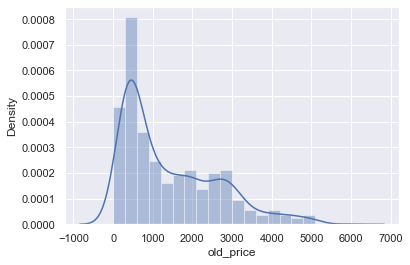

In [41]:
sns.distplot(data["old_price"])

<Axes: xlabel='old_price'>

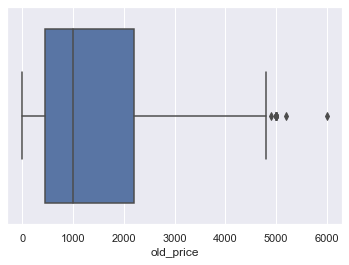

In [42]:
sns.boxplot(data['old_price'], orient='h')

<Axes: xlabel='year_of_market_launch', ylabel='Density'>

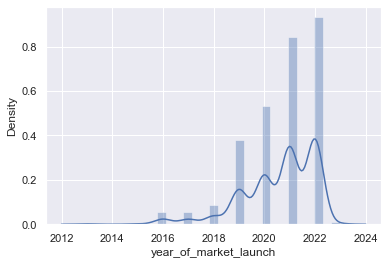

In [43]:
sns.distplot(data["year_of_market_launch"])

<Axes: xlabel='year_of_market_launch'>

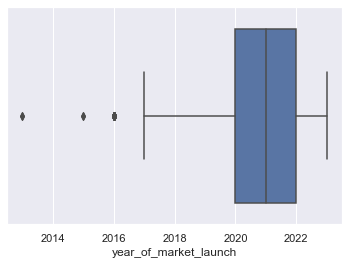

In [44]:
sns.boxplot(data['year_of_market_launch'], orient='h')

In [45]:
data.corr()

,year_of_market_launch,old_price
year_of_market_launch,1.000000,0.265319
old_price,0.265319,1.000000


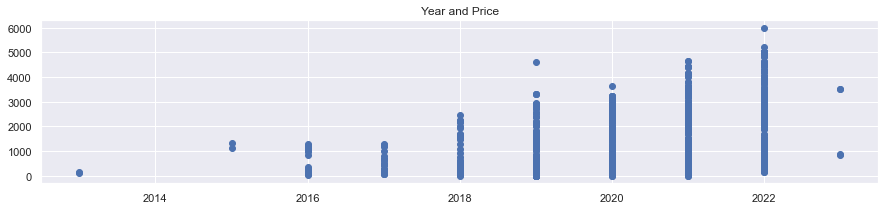

In [46]:
f, (ax1) = plt.subplots(1, 1, sharey=True, figsize = (15,3))
ax1.scatter(data['year_of_market_launch'], data['old_price'])
ax1.set_title('Year and Price')

plt.show()

In [47]:
data.columns

Index(['brand', 'type', 'serie', 'processor', 'ram_size',
       'internal_memory_size', 'main_camera_mp', 'battery_capacity_mah',
       'year_of_market_launch', 'color', 'old_price'],
      dtype='object')

In [48]:
data.columns = ['Brand', 'Type', 'Serie','Processor', 'Ram_size', 'Internal_memory_size','Main_camera_mp',
                'Battery_capacity_mah', 'Year_of_market_launch', 'Color', 'Old_price']
data.head()

,Brand,Type,Serie,Processor,Ram_size,Internal_memory_size,Main_camera_mp,Battery_capacity_mah,Year_of_market_launch,Color,Old_price
0,Xiaomi,Smartfon,Xiaomi Redmi Note 11S,MediaTek Helio G96,8,128,100,5000-5999,2022,Boz,579
1,Samsung,Smartfon,Samsung Galaxy A53,Samsung Exynos 1280,8,256,49 - 64,5000-5999,2022,Qara,1099
2,Xiaomi,Smartfon,Xiaomi Redmi 10C,Qualcomm Snapdragon 680,4,128,49 - 64,5000-5999,2022,Boz,449
3,Xiaomi,Smartfon,Xiaomi Redmi Note 11S,MediaTek Helio G96,6,128,100,5000-5999,2022,Qara,629
4,Samsung,Smartfon,Samsung Galaxy A13,Samsung Exynos 850,4,64,49 - 64,5000-5999,2022,Qara,429


## Train Test Split

In [49]:
X = data.drop(['Old_price'], axis=1)
y = data['Old_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
X_train

,Brand,Type,Serie,Processor,Ram_size,Internal_memory_size,Main_camera_mp,Battery_capacity_mah,Year_of_market_launch,Color
899,Xiaomi,Smartfon,Xiaomi Redmi Note 10S,MediaTek Helio G95,6,64,49 - 64,5000-5999,2021,Göy
881,Apple,Smartfon,Apple iPhone 11,Apple A13 Bionic,4,64,9 - 15,3000-3999,2019,Sarı
310,Samsung,Smartfon,Samsung Galaxy S10 Plus,Samsung Exynos 9820,8,128,9 - 15,4000-4999,2019,Qara
1145,Apple,Smartfon,Apple iPhone 12 mini,Apple A14 Bionic,4,64,9 - 15,1999,2020,Yaşıl
31,Xiaomi,Smartfon,Xiaomi Poco X4 Pro,Qualcomm Snapdragon 695,8,256,100,5000-5999,2022,Göy
...,...,...,...,...,...,...,...,...,...,...
1095,Huawei,Smartfon,Huawei Y6,MediaTek Helio A22,2,32,9 - 15,3000-3999,2019,Qara
1130,Apple,Smartfon,Apple iPhone 12 mini,Apple A14 Bionic,4,128,9 - 15,1999,2020,Qara
1294,Samsung,Smartfon,Samsung Galaxy A72,Qualcomm Snapdragon 720G,8,256,49 - 64,5000-5999,2021,Qara
860,Tecno,Smartfon,Tecno Spark 6 Go,Helio A22,2,32,9 - 15,5000-5999,2020,Ağ


In [51]:
y_train

899      508
881     1548
310     2200
1145    1465
31       899
        ... 
1095     349
1130    1899
1294    1149
860      269
1126    1049
Name: Old_price, Length: 1148, dtype: int32

# Create a Random Forest Regression

In [52]:
data

,Brand,Type,Serie,Processor,Ram_size,Internal_memory_size,Main_camera_mp,Battery_capacity_mah,Year_of_market_launch,Color,Old_price
0,Xiaomi,Smartfon,Xiaomi Redmi Note 11S,MediaTek Helio G96,8,128,100,5000-5999,2022,Boz,579
1,Samsung,Smartfon,Samsung Galaxy A53,Samsung Exynos 1280,8,256,49 - 64,5000-5999,2022,Qara,1099
2,Xiaomi,Smartfon,Xiaomi Redmi 10C,Qualcomm Snapdragon 680,4,128,49 - 64,5000-5999,2022,Boz,449
3,Xiaomi,Smartfon,Xiaomi Redmi Note 11S,MediaTek Helio G96,6,128,100,5000-5999,2022,Qara,629
4,Samsung,Smartfon,Samsung Galaxy A13,Samsung Exynos 850,4,64,49 - 64,5000-5999,2022,Qara,429
...,...,...,...,...,...,...,...,...,...,...,...
1431,Huawei,Smartfon,Huawei Nova Y70,HiSilicon Kirin 710A,4,64,21 - 48,6000,2022,Qara,385
1432,Tecno,Smartfon,Tecno Pova 3,MediaTek Helio G88,6,128,49 - 64,7000,2022,Göy,549
1433,Samsung,Smartfon,Samsung Galaxy A03,Unisoc T606,3,32,21 - 48,5000-5999,2022,Qara,319
1434,Samsung,Smartfon,Samsung Galaxy A03,Unisoc T607,3,32,21 - 48,5000-5999,2022,Qırmızı,319


In [53]:
transformer = ColumnTransformer(transformers = [
    ('one_hot_encoder', OneHotEncoder(sparse=False, categories = 'auto', handle_unknown="ignore"),
    ['Brand', 'Type', 'Serie', 'Processor', 'Ram_size', 'Internal_memory_size', 'Main_camera_mp',
    'Battery_capacity_mah', 'Color'])], remainder = 'passthrough')

model = RandomForestRegressor(random_state = 42)

pipe = Pipeline(steps=[('preprocessor', transformer), ('model', model)])

pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Brand', 'Type', 'Serie',
                                                   'Processor', 'Ram_size',
                                                   'Internal_memory_size',
                                                   'Main_camera_mp',
                                                   'Battery_capacity_mah',
                                                   'Color'])])),
                ('model', RandomForestRegressor(random_state=42))])

## MAE and RMSE for Train Set

In [54]:
mse = mean_squared_error(y_train,pipe.predict(X_train))      
rmse = np.sqrt(mse)

print('MAE:', mean_absolute_error(y_train, pipe.predict(X_train)))
print('RMSE:', rmse)
print('R2_score:', r2_score(y_train, pipe.predict(X_train)))

MAE: 85.08128148580653
RMSE: 161.93068995289715
R2_score: 0.9812886993992395


## MAE and RMSE for Test Set

In [55]:
mse = mean_squared_error(y_test,pipe.predict(X_test))      
rmse = np.sqrt(mse)

print('MAE:', mean_absolute_error(y_test, pipe.predict(X_test)))
print('RMSE:', rmse)
print('R2_score:', r2_score(y_test, pipe.predict(X_test)))

MAE: 174.13007157108447
RMSE: 331.1569364010308
R2_score: 0.9291340123279193


In [56]:
data

,Brand,Type,Serie,Processor,Ram_size,Internal_memory_size,Main_camera_mp,Battery_capacity_mah,Year_of_market_launch,Color,Old_price
0,Xiaomi,Smartfon,Xiaomi Redmi Note 11S,MediaTek Helio G96,8,128,100,5000-5999,2022,Boz,579
1,Samsung,Smartfon,Samsung Galaxy A53,Samsung Exynos 1280,8,256,49 - 64,5000-5999,2022,Qara,1099
2,Xiaomi,Smartfon,Xiaomi Redmi 10C,Qualcomm Snapdragon 680,4,128,49 - 64,5000-5999,2022,Boz,449
3,Xiaomi,Smartfon,Xiaomi Redmi Note 11S,MediaTek Helio G96,6,128,100,5000-5999,2022,Qara,629
4,Samsung,Smartfon,Samsung Galaxy A13,Samsung Exynos 850,4,64,49 - 64,5000-5999,2022,Qara,429
...,...,...,...,...,...,...,...,...,...,...,...
1431,Huawei,Smartfon,Huawei Nova Y70,HiSilicon Kirin 710A,4,64,21 - 48,6000,2022,Qara,385
1432,Tecno,Smartfon,Tecno Pova 3,MediaTek Helio G88,6,128,49 - 64,7000,2022,Göy,549
1433,Samsung,Smartfon,Samsung Galaxy A03,Unisoc T606,3,32,21 - 48,5000-5999,2022,Qara,319
1434,Samsung,Smartfon,Samsung Galaxy A03,Unisoc T607,3,32,21 - 48,5000-5999,2022,Qırmızı,319


## Testing new rows

In [57]:
prediction = np.array(["Samsung","Smartfon","Samsung Galaxy A53","2400x1080","Samsung Exynos 1280", "8", "256", "49-64", "5000-5999",2022,"Qara"])
prediction = prediction.reshape(1, 11)
df = pd.DataFrame(data=prediction, 
                    columns=['Brand', 'Type', 'Serie', 'Screen_resolution_mp', 'Processor', 'Ram_size', 'Internal_memory_size', 'Main_camera_mp',
       'Battery_capacity_mah', 'Year_of_market_launch', 'Color'])
pipe.predict(df)

array([1124.26257143])

In [58]:
# real price for Samsung A53 is 1099 Azn

In [59]:
prediction = np.array(["Apple","Smartfon","Apple iPhone 14 Pro","2556x1179","Apple A16 Bionic", "6", "128", "21-48", "3000-3999",2022,"Bənövşəyi"])
prediction = prediction.reshape(1, 11)
df = pd.DataFrame(data=prediction, 
                    columns=['Brand', 'Type', 'Serie', 'Screen_resolution_mp', 'Processor', 'Ram_size', 'Internal_memory_size', 'Main_camera_mp',
       'Battery_capacity_mah', 'Year_of_market_launch', 'Color'])
pipe.predict(df)

array([2918.18907143])

In [60]:
# real price for Apple 14 pro is 2700 Azn